<a href="https://colab.research.google.com/github/safranco8/ayvd-entregables-grupo-31/blob/main/20220419_Entregable_1_Parte_1_Grupo_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
#01
#Importo las librerias necesarias 
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
#10
#Cargo la base de datos de encuentas en un DF
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
#20
#Muestro las primeras 5 filas
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
#30
#imprimo todas las columnas del DF para decidir cuales selecciono en posterior analisis
list(df.columns)

['profile_gender',
 'profile_age',
 'work_country',
 'work_province',
 'profile_years_experience',
 'work_years_in_company',
 'work_years_in_current_position',
 'work_people_in_charge_of',
 'profile_studies_level',
 'profile_studies_level_state',
 'profile_career',
 'profile_university',
 'profile_specialization_courses',
 'profile_open_source_contributions',
 'profile_programming_as_hobby',
 'work_role',
 'tools_platform',
 'tools_programming_languages',
 'tools_frameworks',
 'tools_data_bases',
 'tools_qa_testing',
 'tools_IDEs',
 'tools_work_pc_os',
 'tools_cellphone_os',
 'work_on_call_duty',
 'salary_on_call_duty_charge',
 'work_on_call_duty_charge_type',
 'work_contract_type',
 'salary_monthly_BRUTO',
 'salary_monthly_NETO',
 'salary_in_usd',
 'salary_satisfaction',
 'salary_comparison_last_semester',
 'salary_has_bonus',
 'salary_bonus_tied_to',
 'salary_inflation_adjustment_2020',
 'salary_percentage_inflation_adjustment_2020',
 'salary_month_last_inflation_adjustment',
 'work_

In [ ]:
#31
#eligo columnas para crear un nuevo DF (ver #60)
#Consigna:
#  Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
#  Para ello:
#  Seleccionar las columnas relevantes para analizar.

#--- VARIABLES ---
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO']
#relevant_columns = ['profile_gender',
# 'profile_age',
# 'work_province',
# 'profile_years_experience',
# 'work_years_in_current_position',
# 'work_people_in_charge_of',
# 'profile_studies_level',
# 'profile_studies_level_state',
# 'profile_career',
# 'work_role',
# 'tools_programming_languages',
# 'work_contract_type',
# 'salary_monthly_NETO',
# 'salary_satisfaction',
# 'company_employee_number',
# 'company_extra_benefits',
#]


### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
#40
df.tools_programming_languages[:25]

0                                               Ninguno
1                              HTML, Javascript, Python
2                                               Ninguno
3     Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                CSS, HTML, Javascript, SQL, TypeScript
5                                      Java, Javascript
6                                            Javascript
7                                      Java, Javascript
8                           Javascript, PHP, TypeScript
9               Assembler, Bash/Shell, C, C#, Python, R
10                             HTML, Javascript, Python
11                                   Bash/Shell, Python
12                      CSS, HTML, Javascript, PHP, SQL
13                           HTML, Javascript, PHP, SQL
14    .NET, C#, Delphi, HTML, Java, Javascript, PHP,...
15                                      Bash/Shell, PHP
16     .NET, C#, CSS, HTML, Javascript, SQL, TypeScript
17                               HTML, Java, Jav

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
#50
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('ninguno','')\
    .replace('ninguna','')\
    .replace('-','')\
    .replace('.','')  
    # Reemplaza 'ninguno de los anteriores' y lo deja vacio
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '') # strip() elimina los espacios y replace() Reemplaza ',' y lo deja vacio
          for lang in languages_str.split()] # Divide los str separandolos por ',' 
# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
df.cured_programming_languages[:25]


0                                                    []
1                            [html, javascript, python]
2                                                    []
3     [bash/shell, c, css, html, java, javascript, p...
4              [css, html, javascript, sql, typescript]
5                                    [java, javascript]
6                                          [javascript]
7                                    [java, javascript]
8                         [javascript, php, typescript]
9             [assembler, bash/shell, c, c#, python, r]
10                           [html, javascript, python]
11                                 [bash/shell, python]
12                    [css, html, javascript, php, sql]
13                         [html, javascript, php, sql]
14    [net, c#, delphi, html, java, javascript, php,...
15                                    [bash/shell, php]
16    [net, c#, css, html, javascript, sql, typescript]
17                             [html, java, java

In [ ]:
#60
#Como el DF original viene con la columna PROGRAMMING LANGUAGES tipo lista
#lo convertimos para que halla una fila por cada lenguaje de programacion y
#podamos asi hace estadisticas y analisis usando ese criterio
#lo llamamos DF_LANG
#NOTA: cuantas mas columnas hallamos elegido, mas tarda en procesar
#puede tardar varios minutos si se eligieron todas las columnas

df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
    
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
  # We only include in df_lang the columns we are going to analyze later, so we
  # don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."


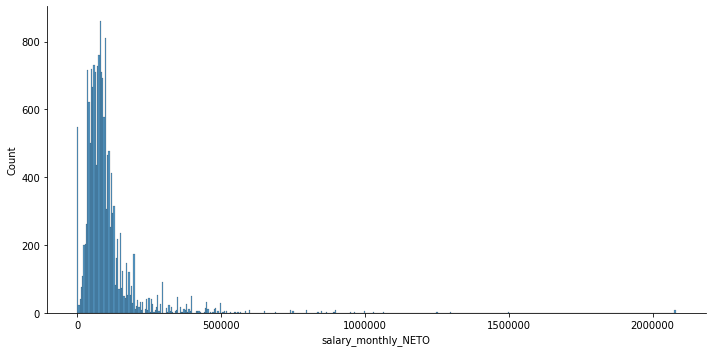

In [ ]:
#70
#Visualizo la cantidad de personas que ganan un determinado salario

sns.displot(df_lang['salary_monthly_NETO'], aspect=2) #cambiar los bins=5,20 0 50 y ver...
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

MAX_SALARY_MONTHLY_NETO: 250000.0


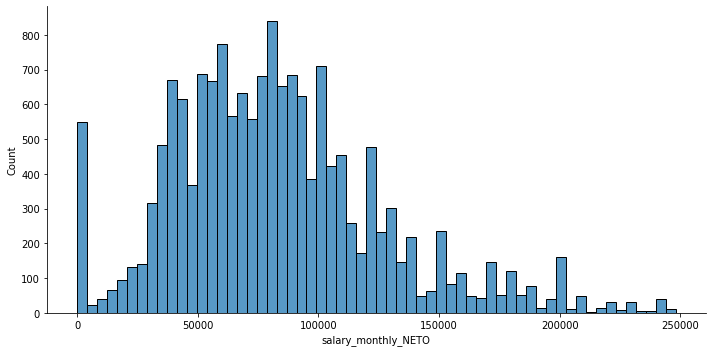

In [ ]:
#80
#Idem anterior, pero pongo limite superior al salario (solo para visualizar aqui)

#--- VARIABLES ---
#MAX_salary_monthly_NETO = 200000
MAX_SALARY_MONTHLY_NETO = df_lang['salary_monthly_NETO'].quantile(0.95) 

print("MAX_SALARY_MONTHLY_NETO:", MAX_SALARY_MONTHLY_NETO) 

sns.displot(df_lang.salary_monthly_NETO[df_lang.salary_monthly_NETO < MAX_SALARY_MONTHLY_NETO].dropna(),
                 stat='count', aspect=2)

QMIN: 22500.0 QMAX: 250000.0


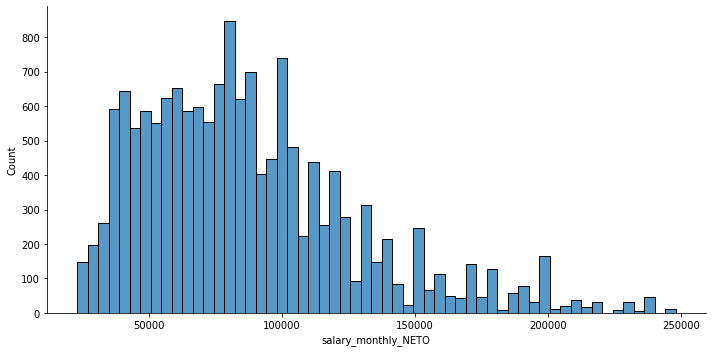

In [ ]:
#90
#filtro por salary_monthly_NETO minimo y maximo
#creo con esto el DF df_lang_filtered_by_salary

#--- VARIABLES ---
QMIN = df_lang['salary_monthly_NETO'].quantile(0.05)
QMAX = df_lang['salary_monthly_NETO'].quantile(0.95)

print("QMIN:", QMIN, "QMAX:", QMAX)

df_lang_filtered_by_salary = df_lang[(df_lang['salary_monthly_NETO'] > QMIN) & (df_lang['salary_monthly_NETO'] < QMAX)].dropna()

sns.displot(df_lang_filtered_by_salary['salary_monthly_NETO'], stat='count', aspect=2)


In [ ]:
#100
#filtro por salary_monthly_NETO minimo y maximo
#creo con esto el DF df_lang_filtered_by_salary
#y visualizo el los promedios para cada lenguaje de programacion
#creando el DF df_mean_grouped_by_lang

#--- VARIABLES ---
TRASH_VALUES = ['', 'del', 'cliente', 'plataforma', 'programo', 'soy']

df_mean_grouped_by_lang = df_lang_filtered_by_salary.groupby('programming_language').mean()

df_mean_grouped_by_lang = df_mean_grouped_by_lang.sort_values('salary_monthly_NETO', ascending=False).reset_index()

#df_mean_grouped_by_lang = df_mean_grouped_by_lang.rename(columns={'salary_monthly_NETO': 'mean_salary_monthly_NETO', 'salary_monthly_BRUTO': 'mean_salary_monthly_BRUTO'}).apply(lambda s: '{0:.2f}'.format(s))
df_mean_grouped_by_lang = df_mean_grouped_by_lang.rename(columns={'salary_monthly_NETO': 'mean_salary_monthly_NETO', 'salary_monthly_BRUTO': 'mean_salary_monthly_BRUTO'})

df_mean_grouped_by_lang = df_mean_grouped_by_lang[~df_mean_grouped_by_lang.programming_language.isin(TRASH_VALUES)]

df_mean_grouped_by_lang[:25]

,programming_language,mean_salary_monthly_NETO,mean_salary_monthly_BRUTO
3,react,200000.000000,300000.000000
4,rust,163118.504615,231309.230769
5,rexx,150000.000000,240000.000000
6,mongodb,150000.000000,235000.000000
8,recruiter,150000.000000,200000.000000
10,verilog,150000.000000,216000.000000
11,elixir,138469.166667,202083.333333
12,tibco,136000.000000,189000.000000
13,graphql,132000.000000,182000.000000
14,tf,130000.000000,180000.000000


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

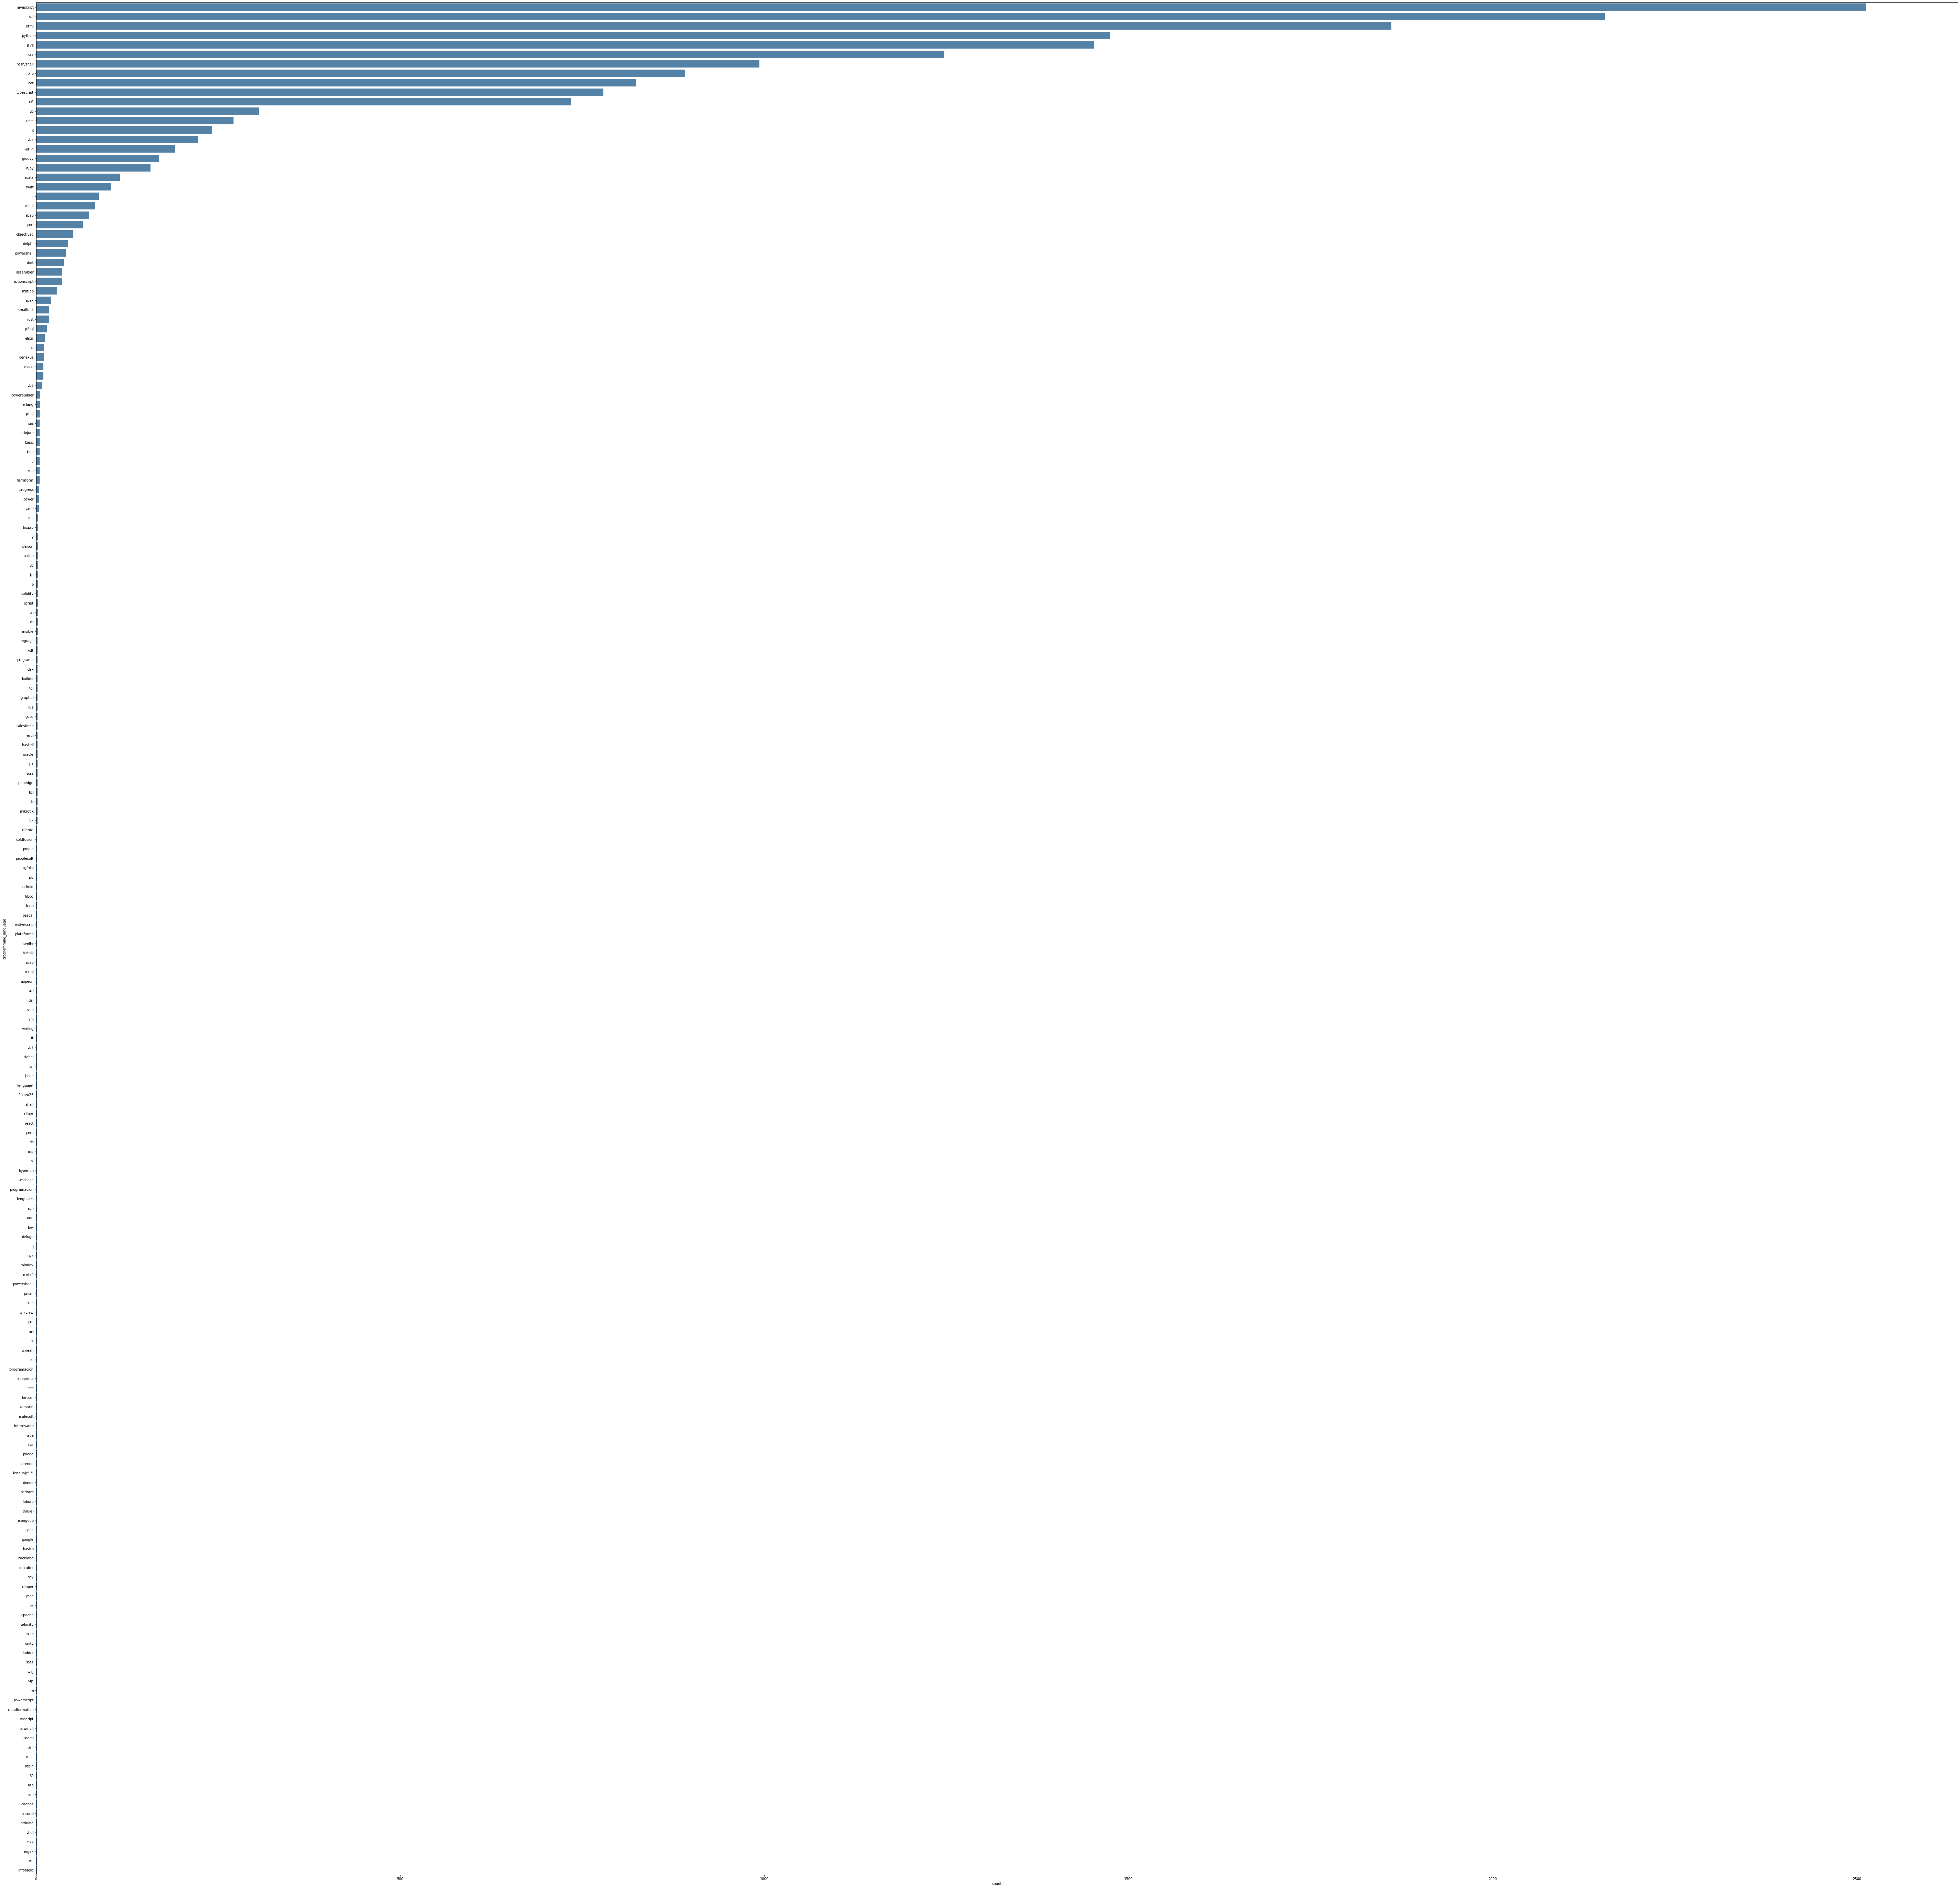

In [ ]:
#110
#Muestro la cantidad de personas que utilizan un determinado lenguage
#para luego poder decidir cuales son los principales y concentrarme en ellos

#Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
#Para ello:
#Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
#Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.

fig = plt.figure(figsize=(100, 100))
sns.countplot(y=df_lang.programming_language, color='steelblue', order=df_lang.programming_language.value_counts().index)

In [ ]:
#120
#Segun el grafico anterior, creo una tabla con la cantidad de personas que usan un lenguaje de programacion
#Saco los resultados mal cargados (vacio, no, /, y, etc) y

#Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
#Para ello:
#Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.

#--- VARIABLES ---
TRASH_VALUES = ['', 'no', '/', 'y', '6']

df_lang_count = df_lang_filtered_by_salary.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'programming_language', 'programming_language': 'frequency'})

df_lang_count = df_lang_count[~df_lang_count.programming_language.isin(TRASH_VALUES)]

df_lang_count[:10]


,programming_language,frequency
0,javascript,2158
1,sql,1908
2,html,1610
3,java,1290
4,python,1279
5,css,1077
6,bash/shell,888
7,php,772
8,net,720
9,typescript,660


In [ ]:
#130
#Eligo un un percentil que considero son los lenguajes principales de programacion y
#creo el DF df_lang_count_filtered_by_quantile

#Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
#Para ello:
#Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.

#--- VARIABLES ---
CRITERIO = 0.01 #El lenguaje tiene que se usado por lo menos por el 1% de los encuestados

lang_count = len(df) * CRITERIO

df_lang_count_filtered = df_lang_count[df_lang_count.frequency > lang_count]

df_lang_count_filtered

,programming_language,frequency
0,javascript,2158
1,sql,1908
2,html,1610
3,java,1290
4,python,1279
5,css,1077
6,bash/shell,888
7,php,772
8,net,720
9,typescript,660


In [ ]:
#150
#filtro la tabla principal df_lang_filtered_by_salary por los principales lenguajes de programacion
#asi despues puedo graficar comparativamente las estadisticas entre los principales lenguages
#de programacion, lo guardo en el DF df_lang_filtered_by_salary_and_lang

most_used_langs = df_lang_count_filtered.programming_language.tolist()

df_lang_filtered_by_salary_and_lang = df_lang_filtered_by_salary[df_lang_filtered_by_salary.programming_language.isin(most_used_langs)]

df_lang_filtered_by_salary_and_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[net, c#, cobol, css, html, javascript, php, s..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[net, c#, cobol, css, html, javascript, php, s..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[net, c#, cobol, css, html, javascript, php, s..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[net, c#, cobol, css, html, javascript, php, s..."


In [ ]:
#151
#reordeno ascescendente por mediana
order_index = df_lang_filtered_by_salary_and_lang.groupby(by=["programming_language"]).agg({
    "salary_monthly_NETO": 'median'
}).sort_values(by=['salary_monthly_NETO'], ascending=False).index

order_index


Index(['scala', 'go', 'kotlin', 'groovy', 'swift', 'ruby', 'bash/shell',
       'cobol', 'python', 'java', 'typescript', 'r', 'c', 'javascript', 'c++',
       'net', 'sql', 'c#', 'abap', 'php', 'html', 'vba', 'css'],
      dtype='object', name='programming_language')

In [ ]:
#152
#guardo el DF como CSV para usarlo en reportes del Entregable 2
df_lang_filtered_by_salary_and_lang.to_csv("sysarmy_survey_2022_processed-df_lang_filtered_by_salary_and_lang.csv", index=False)

from google.colab import files
files.download("sysarmy_survey_2022_processed-df_lang_filtered_by_salary_and_lang.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

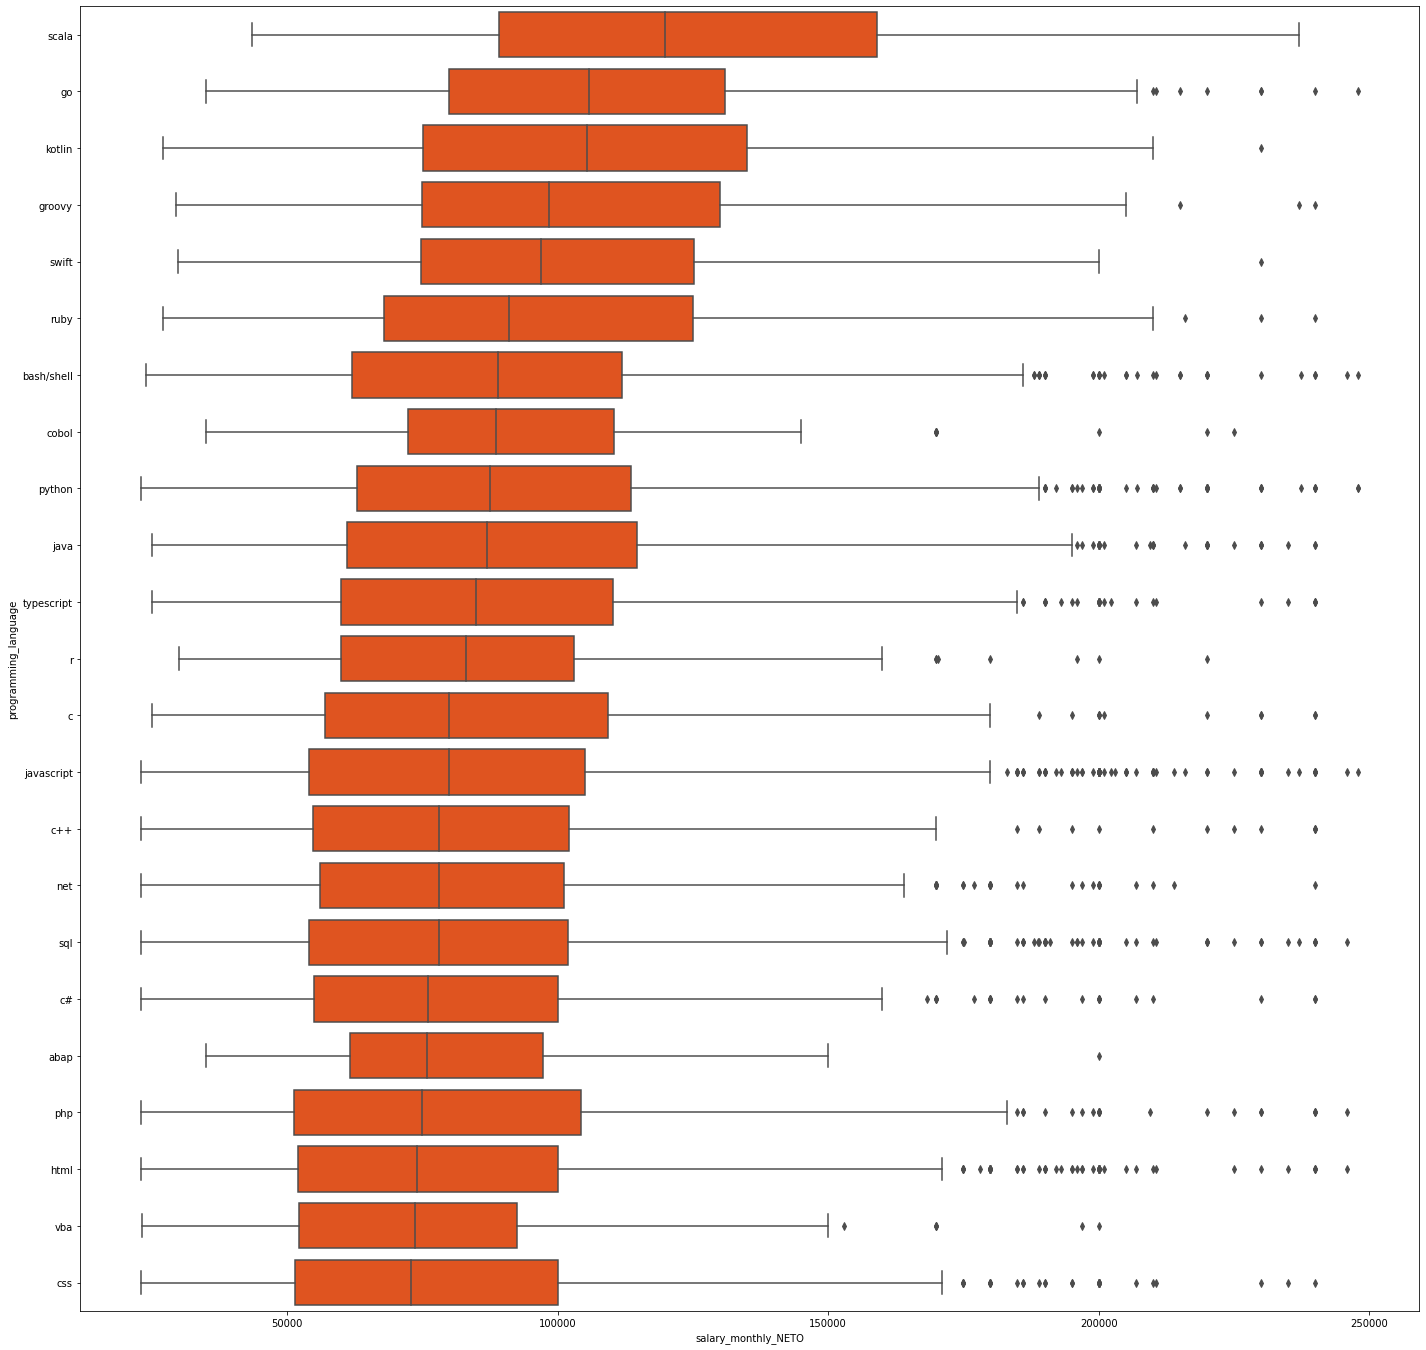

In [ ]:
#160
#Visualizo comparativamente el salary_montly_NETO por lenguaje de programacion

#Consigna:
#  Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
#  Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.

plt.figure(figsize=(24, 24))
sns.boxplot(data=df_lang_filtered_by_salary_and_lang, x='salary_monthly_NETO', y='programming_language',
                color='orangered', order=order_index)

plt.ticklabel_format(style='plain', axis='x')

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**
- Respuesta: 
  Funcion de densidad conjunta, Covarianza, Coeficiente de correlación, Probabilidad condicional.
  Tabla de contingencia, Mapa de calor.

  A COMPLETAR!



In [ ]:
#170
#---VARIABLES---
#COLUMNAS = ["profile_gender", "programming_language", "profile_years_experience", "work_people_in_charge_of", "salary_monthly_NETO"]
#COLUMNAS = ["profile_gender", "work_province", "profile_years_experience", "work_people_in_charge_of", "salary_monthly_NETO"]
#COLUMNAS = ["profile_gender", "profile_studies_level", "profile_years_experience", "work_people_in_charge_of", "salary_monthly_NETO"]
COLUMNAS = ["profile_age","salary_percentage_inflation_adjustment_2020","salary_satisfaction","profile_gender", "profile_studies_level", "work_province", "profile_years_experience", "work_people_in_charge_of", "salary_monthly_NETO"]
NETO_QMIN = df['salary_monthly_NETO'].quantile(0.05)
NETO_QMAX = df['salary_monthly_NETO'].quantile(0.95)
MAX_YEARS_EXPERIENCE = 60
MAX_PEOPLE_IN_CHARGE_OF = 100
MAX_AGE = 80
SORTED_STUDIES_LEVELS = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
df2 = df[COLUMNAS]
df2_cured = df2[(df2['salary_monthly_NETO'] > NETO_QMIN) &\
                (df2['salary_monthly_NETO'] < NETO_QMAX) &\
                (df2['profile_years_experience'] < MAX_YEARS_EXPERIENCE) &\
                (df2['work_people_in_charge_of'] < MAX_PEOPLE_IN_CHARGE_OF) &\
                (df2['profile_age'] < MAX_AGE)]

df2_cured  

,profile_age,salary_percentage_inflation_adjustment_2020,salary_satisfaction,profile_gender,profile_studies_level,work_province,profile_years_experience,work_people_in_charge_of,salary_monthly_NETO
0,26,0.0,1,Mujer,Universitario,Ciudad Autónoma de Buenos Aires,3.0,0,43000.0
1,29,10.0,2,Hombre,Universitario,Corrientes,5.0,4,63000.0
2,22,0.0,3,Mujer,Secundario,Ciudad Autónoma de Buenos Aires,2.0,0,127000.0
3,39,0.0,3,Hombre,Posgrado,Corrientes,15.0,5,102000.0
4,32,0.0,1,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,9.0,0,106000.0
...,...,...,...,...,...,...,...,...,...
6088,32,0.0,2,Hombre,Secundario,Provincia de Buenos Aires,13.0,0,56450.0
6089,32,20.0,3,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,10.0,0,130000.0
6090,37,0.0,3,Hombre,Terciario,Ciudad Autónoma de Buenos Aires,13.0,0,97000.0
6091,38,14.0,3,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,12.0,0,71000.0


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




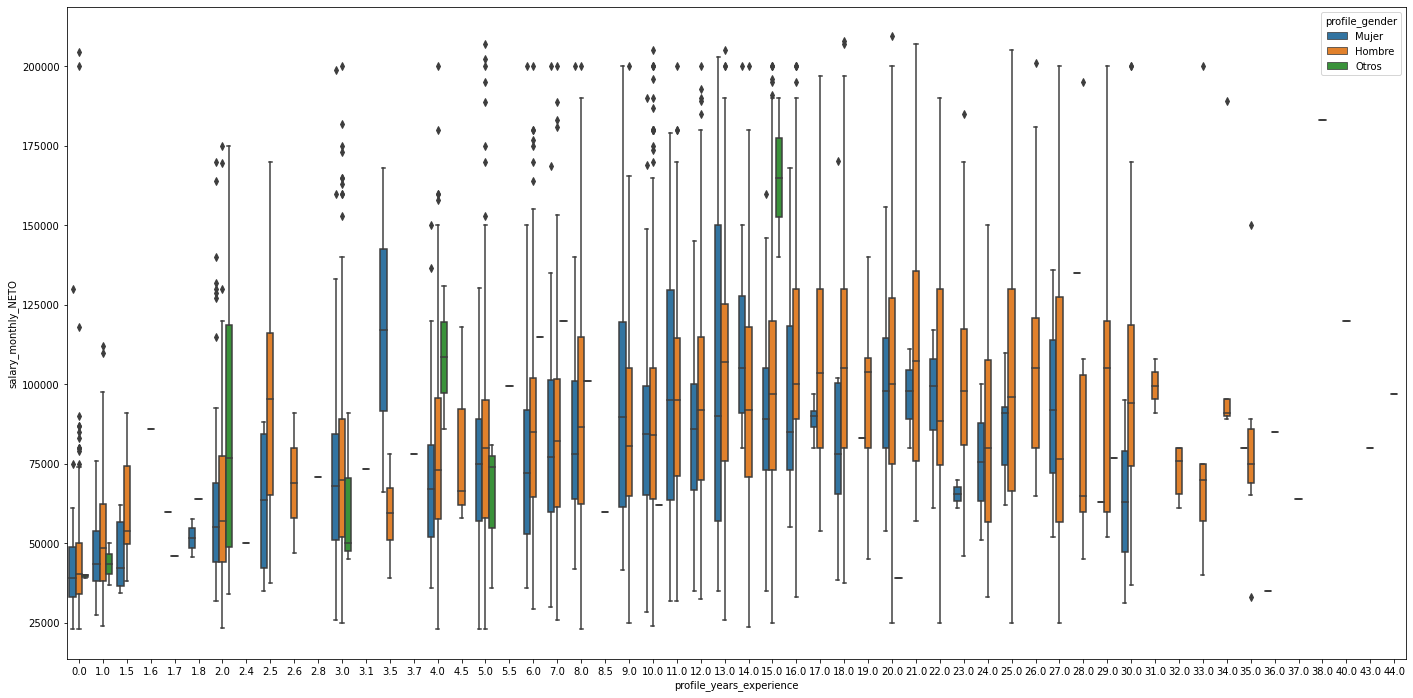

In [ ]:
#180
#
plt.figure(figsize=(24, 12))
#sns.scatterplot(data=df_lang_filtered_by_salary_reduced_columns, x="profile_years_experience", y="salary_monthly_NETO", hue="profile_gender")
sns.boxplot(data=df2_cured, x="profile_years_experience", y="salary_monthly_NETO",
          hue="profile_gender")


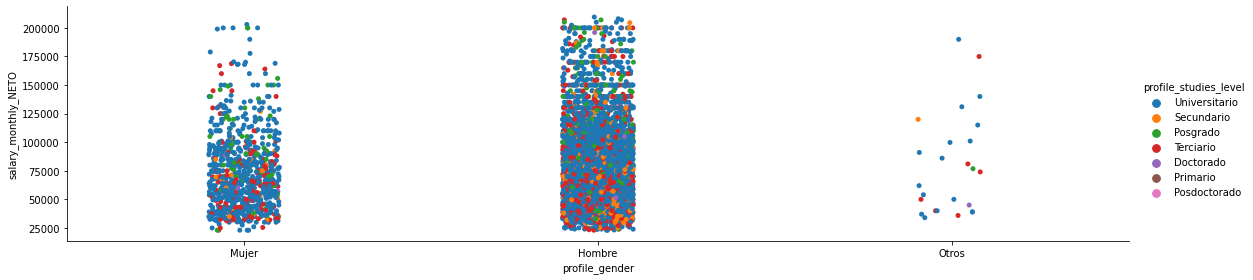

In [ ]:
#190
#Salario neto promedio según género/estudios
neto_by_gender_studies = pd.crosstab(df2_cured.profile_gender, 
                                     df2_cured.profile_studies_level,
                                     values=df2_cured.salary_monthly_NETO,
                                     aggfunc=numpy.mean)[SORTED_STUDIES_LEVELS]\
                                     .fillna(0)\
                                     .applymap('{:.2f}'.format)
sns.catplot(data=df2_cured, y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='profile_gender', hue="profile_studies_level", height=4, aspect=4)

In [ ]:
#200
#Tabla de contingencia de salarios medios por provincia/nivel de estudios

neto_by_gender_studies = pd.crosstab(df2_cured.work_province,
                                     df2_cured.profile_studies_level)[SORTED_STUDIES_LEVELS]\
                                     .fillna(0)\
                                     .applymap('{:.1f}'.format)
neto_by_gender_studies

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
work_province,,,,,,,
Catamarca,0.0,0.0,0.0,3.0,0.0,0.0,0.0
Chaco,0.0,1.0,4.0,17.0,0.0,0.0,0.0
Chubut,0.0,1.0,3.0,15.0,0.0,0.0,0.0
Ciudad Autónoma de Buenos Aires,1.0,259.0,620.0,2224.0,196.0,12.0,1.0
Corrientes,0.0,0.0,1.0,9.0,6.0,0.0,0.0
Córdoba,0.0,17.0,89.0,253.0,15.0,4.0,0.0
Entre Ríos,0.0,4.0,8.0,39.0,2.0,1.0,0.0
Formosa,0.0,0.0,2.0,2.0,0.0,0.0,0.0
GBA,1.0,50.0,99.0,269.0,15.0,2.0,0.0


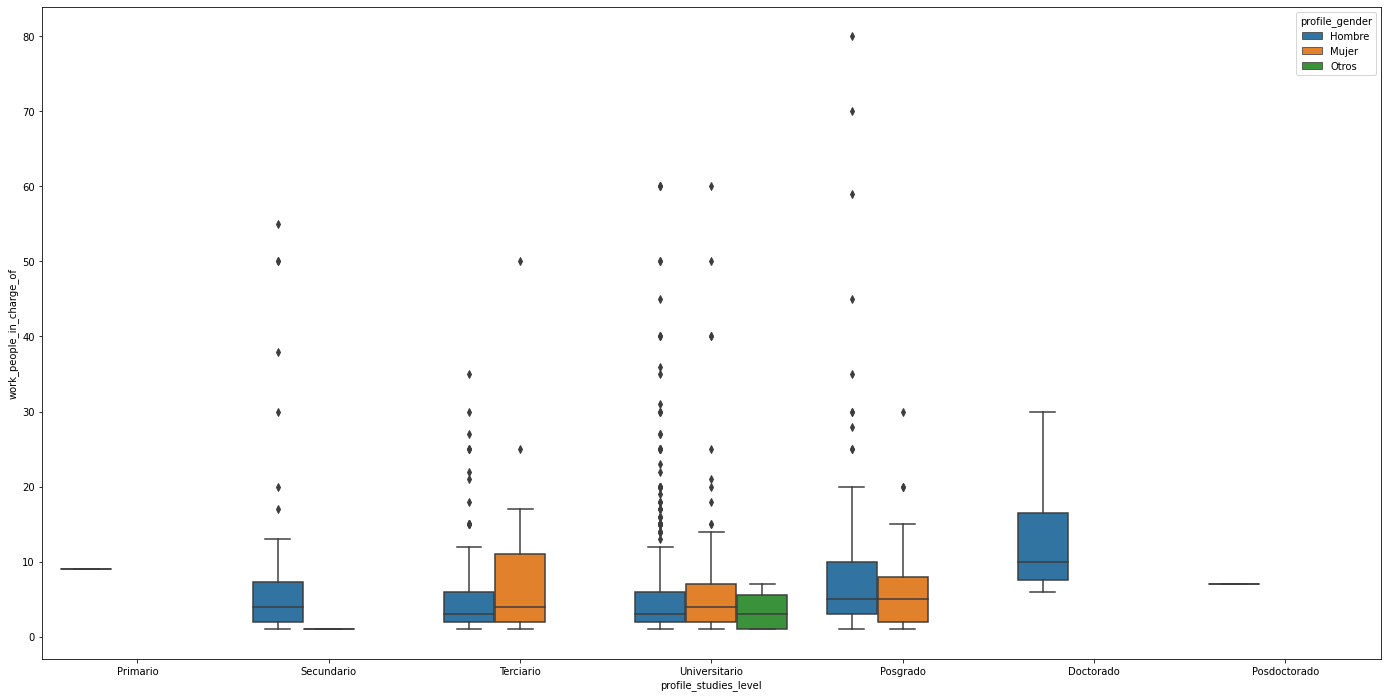

In [ ]:
#210
#Tabla de contingencia de gente a cargo segun nivel de estudios

nueva_tabla = df2_cured[df2_cured["work_people_in_charge_of"] > 0]
plt.figure(figsize=(24, 12))
sns.boxplot(data=nueva_tabla, x="profile_studies_level", y="work_people_in_charge_of",
          hue="profile_gender", order=SORTED_STUDIES_LEVELS)

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [ ]:
#220
#Calculo de correlacion entre el salario neto y bruto

#+1 – Correlación positiva completa
#+0,8 – Fuerte correlación positiva
#+0,6 – Correlación positiva moderada
#0} – sin correlación alguna
#-0,6 – Correlación negativa moderada
#-0,8 – Fuerte correlación negativa
#-1 – Correlación negativa completa

df_correlation = df[["salary_monthly_NETO", "salary_monthly_BRUTO"]]

#df_correlation.corr(method='pearson')
#df_correlation.corr(method='spearman')
df_correlation.corr(method='kendall')


,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.00000,0.86959
salary_monthly_BRUTO,0.86959,1.00000


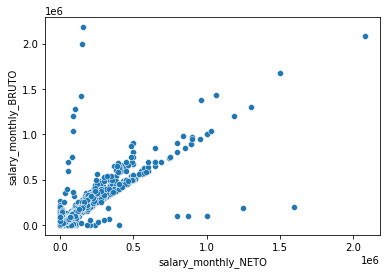

In [ ]:
#230
sns.scatterplot(data=df_correlation, x="salary_monthly_NETO", y="salary_monthly_BRUTO")

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






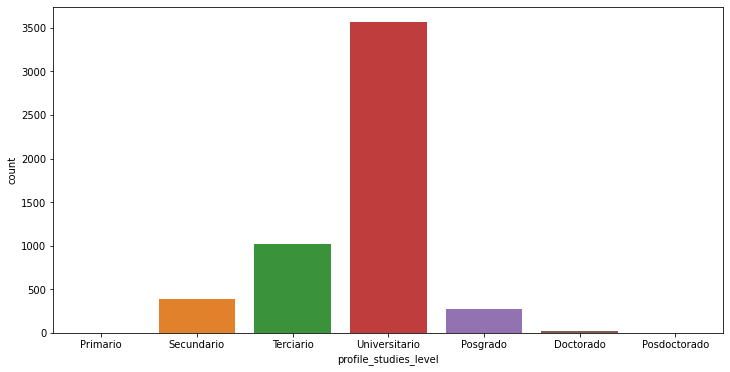

In [ ]:
#240
#Histogramas para ver que subpoblaciones son numerosas según nivel de estudio

#Cuenta según nivel de estudio para tomar subpoblaciones grandes
plt.figure(figsize=(12, 6))
sns.countplot(data=df2_cured,x="profile_studies_level", order=SORTED_STUDIES_LEVELS)

In [ ]:
#250
#Creamos dataframes con las subpoblaciones numerosas: terciarios y universitarios
df_terciarios     = df2_cured[df2_cured['profile_studies_level'] == "Terciario"]
df_universitarios = df2_cured[df2_cured['profile_studies_level'] == "Universitario"]

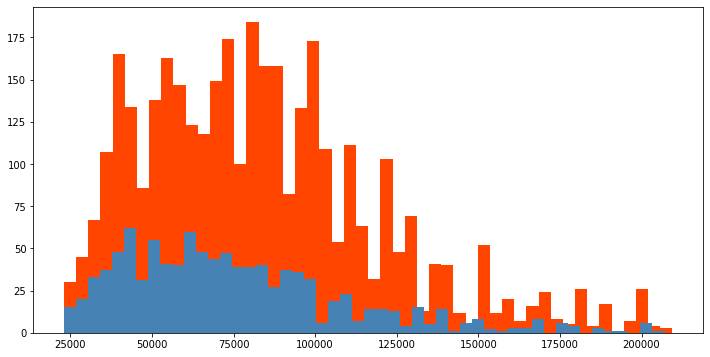

In [ ]:
#260
#PREGUNTA: grafique de manera comparativa ambos histogramas de la variable 'salary_monthly_NETO'

plt.figure(figsize=(12, 6))
plt.hist(df_universitarios['salary_monthly_NETO'], color='orangered', bins=50)
plt.hist(df_terciarios['salary_monthly_NETO'], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()

In [ ]:
#270
#PREGUNTA: Calcule medidas de centralización y dispersión para cada subpoblación
mean_salario_terciarios = df_terciarios['salary_monthly_NETO'].mean()
std_salario_terciarios  = df_terciarios['salary_monthly_NETO'].std()
mean_salario_universitarios = df_universitarios['salary_monthly_NETO'].mean()
std_salario_universitarios  = df_universitarios['salary_monthly_NETO'].std()

print("Salario Terciarios:")
print("Media:", mean_salario_terciarios, "Desviación:", std_salario_terciarios)
print("Salario universitarios:")
print("Media:", mean_salario_universitarios, "Desviación:", std_salario_universitarios)

print("Relacion de medias:", (mean_salario_universitarios/mean_salario_terciarios))
print("Relacion de desviaciones:", (std_salario_universitarios/std_salario_terciarios))

Salario Terciarios:
Media: 75371.04533856723 Desviación: 34969.38176197753
Salario universitarios:
Media: 83593.87669472504 Desviación: 36450.19709853913
Relacion de medias: 1.1090980139551043
Relacion de desviaciones: 1.0423460542322684


In [ ]:
#280
# DF de terciarios y universitarios en mismo DF (no en 2 DF como antes)

df_terc_univ = df2_cured[(df2_cured.profile_studies_level == "Terciario") | (df2_cured.profile_studies_level == "Universitario")]
df_terc_univ

,profile_age,salary_percentage_inflation_adjustment_2020,salary_satisfaction,profile_gender,profile_studies_level,work_province,profile_years_experience,work_people_in_charge_of,salary_monthly_NETO
0,26,0.0,1,Mujer,Universitario,Ciudad Autónoma de Buenos Aires,3.0,0,43000.0
1,29,10.0,2,Hombre,Universitario,Corrientes,5.0,4,63000.0
4,32,0.0,1,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,9.0,0,106000.0
5,25,15.0,2,Hombre,Terciario,Ciudad Autónoma de Buenos Aires,1.0,0,44000.0
6,33,8.0,3,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,1.0,0,62400.0
...,...,...,...,...,...,...,...,...,...
6087,43,26.0,3,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,25.0,0,120000.0
6089,32,20.0,3,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,10.0,0,130000.0
6090,37,0.0,3,Hombre,Terciario,Ciudad Autónoma de Buenos Aires,13.0,0,97000.0
6091,38,14.0,3,Hombre,Universitario,Ciudad Autónoma de Buenos Aires,12.0,0,71000.0


In [ ]:
#290
df_crosstab = pd.crosstab(df_terc_univ.salary_monthly_NETO, df_terc_univ.profile_studies_level, normalize=True)
df_crosstab

profile_studies_level,Terciario,Universitario
salary_monthly_NETO,,
22980.0,0.000218,0.000000
23000.0,0.000000,0.001091
23003.0,0.000218,0.000000
23200.0,0.000000,0.000218
23400.0,0.000218,0.000000
...,...,...
205000.0,0.000000,0.000436
207000.0,0.000000,0.000218
207020.0,0.000218,0.000000


#291

CONSIGNA: ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

RESPUESTA: debido a la fuerte correlación, podemos concluir con una alta probabilidad que hay dependencia entre las variables

In [ ]:
#300
#PREGUNTA: ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

#+1 – Correlación positiva completa
#+0,8 – Fuerte correlación positiva
#+0,6 – Correlación positiva moderada
#0} – sin correlación alguna
#-0,6 – Correlación negativa moderada
#-0,8 – Fuerte correlación negativa
#-1 – Correlación negativa completa

df_crosstab.corr(method='pearson')
#df_correlation.corr(method='spearman')
#df_correlation.corr(method='kendall')


profile_studies_level,Terciario,Universitario
profile_studies_level,,
Terciario,1.000000,0.884601
Universitario,0.884601,1.000000


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


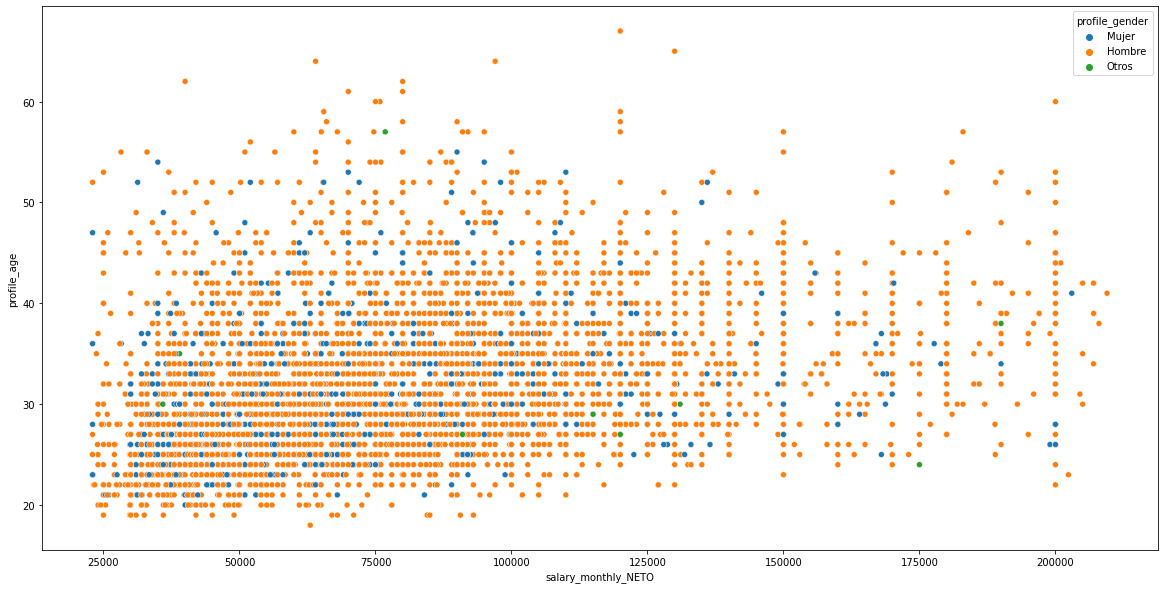

In [ ]:
#290
# Numéricas: Salario / años de experiencia
# Categórica: Género
plt.figure(figsize=(20, 10))
#sns.scatterplot(data=df2_cured, x="profile_age", y="salary_monthly_NETO", hue="profile_gender")
sns.scatterplot(data=df2_cured, x="salary_monthly_NETO", y="profile_age", hue="profile_gender")

#301
A raiz de una alta dispersión del gráfico, que no permite obtener conclusiones, procedemos a utilizar otra tipo de gráfico  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


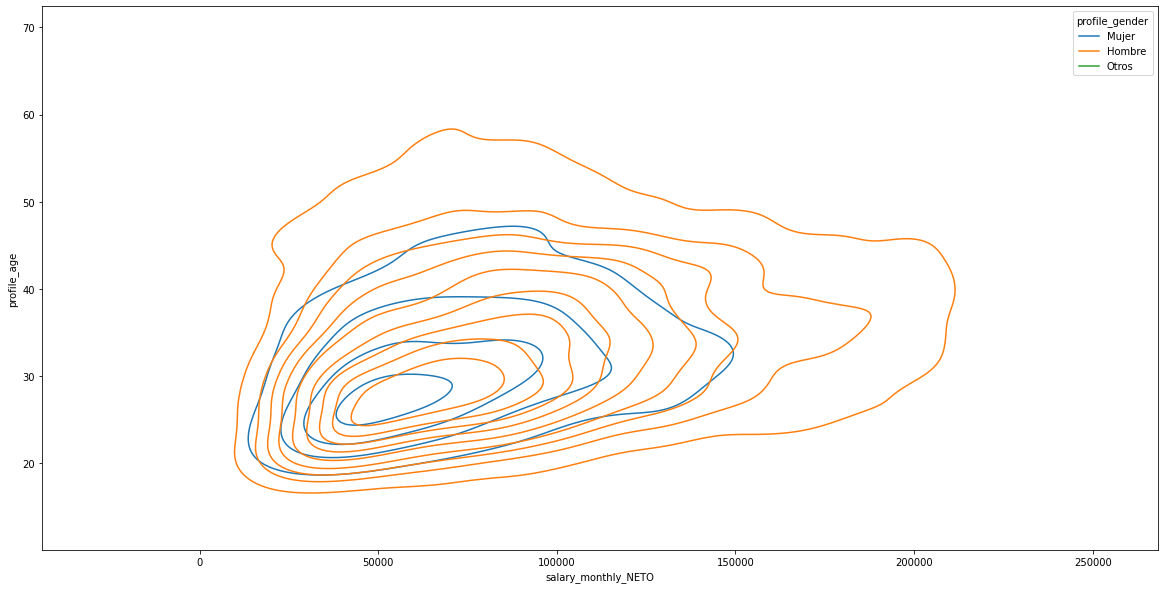

In [ ]:
#310
# Numéricas: Salario / años de experiencia
# Categórica: Género
plt.figure(figsize=(20, 10))
#sns.scatterplot(data=df2_cured, x="salary_monthly_NETO", y="profile_age", hue="profile_gender")
sns.kdeplot(data=df2_cured, x="salary_monthly_NETO", y="profile_age", hue="profile_gender")


#311
Conclusión: se nota mayor dispersión de años y salario entre los hombres que entre las mujeres. 

Se puede suponer, en cuanto a la edad, que esto es debido a un posterior ingreso de la mujer en el mercado laboral de este rubro.
